In [3]:
# Shared Folder Link with all the files: https://drive.google.com/drive/folders/1L_ZXNO7b5yusDao73XOglXti0CbcDie7?usp=drive_link
import os
#Code to connect to drive
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

#Code to connect to shared folder
#os.chdir("/content/drive/.shortcut-targets-byid/10xasdbasbdiluabsdiubiuadWEWEdaq/[SHAREDFOLDER]")



ModuleNotFoundError: No module named 'google'



```
# This is formatted as code
```

# AMLS Lab 2
## Task 1: Support Vector Machine (SVM) on IRIS Dataset

You will first explore SVM based classifiers on the IRIS dataset (see ***SVM()***); you will also experiment with SVM classifiers with different kernels.

## Import libraries
The required libraries for this notebook are pandas, sklearn, copy, numpy, pickle and matplotlib.

In [2]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import classification_report,accuracy_score
import pandas as pd
from sklearn.datasets import load_iris


## IRIS: Load the Data
You will first use the iris dataset (but with only 2 features rather than 4).

In [3]:
# Loading the data file
data = load_iris()
df=pd.DataFrame(data.data,columns=data.feature_names)
print(df.head())

# Drop rest of the features and extract the target values
Y = data.target
X = data.data[:, :2]
#print('features: ',X[0:4])
#print('target labels: ',Y[0:4])
#print(Y)

# Shuffle and split the data into training and test set
X, Y = shuffle(X,Y)
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, random_state=0)


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


## Support Vector Machines (SVMs) Without Kernerls
You will now have to implement SVM classifier (without kernels) using the `SVC()` function from the scikit-learn library:

In [5]:
def SVM(x_train, y_train, x_test):
    # 初始化 SVM 模型
    model = SVC(kernel='linear', random_state=42)  # 你可以更改 kernel 参数，例如 'rbf' 或 'poly'
    
    # 使用训练数据拟合模型
    model.fit(x_train, y_train)
    
    # 对测试数据进行预测
    y_pred = model.predict(x_test)
    
    return y_pred
# Scikit learn library results
y_pred=SVM(x_train,y_train, x_test)
print(accuracy_score(y_test,y_pred))


0.8444444444444444


## Support Vector Machines (SVMs) With Kernels

You will now implement SVM classifiers with various kernels including: linear, polynomial, and rbf (or indeed your own custom kernel).


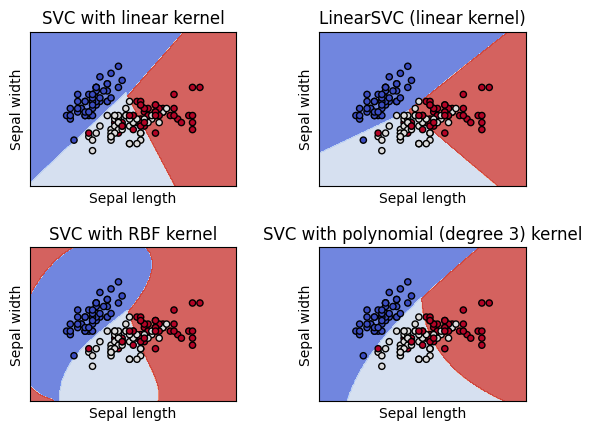

In [6]:
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, C=C))
models = (clf.fit(X, Y) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

def make_meshgrid(x, y, h=.02):

    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)

    return out


# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=Y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()


## Task 2: Support Vector Machine (SVM) on CELEBA Dataset

You will now explore SVM based classifiers on (a subset of) the CELEBA dataset, consisting of 137 images of celebrity faces and associated labels (1 for female and -1 for male) contained in the labels.csv file; note that you will use features extracted from images rather than images themselves (see landmarks.py).


## Import libraries

In [7]:
!pip install keras.preprocessing

In [17]:
import sys
sys.path.append('/content/drive/MyDrive/Colab_Notebooks/')
import numpy as np
from sklearn.metrics import classification_report,accuracy_score
from sklearn import svm
import lab2_landmarks as l2

## Data, Feature Extraction, and SVM Training and Testing
We can extract relevant features from the images by using face detector from dlib library which consists of a combination of the Histogram of Oriented Gradients (HOG) feature with a linear classifier, an image pyramid,and sliding window detection scheme. The image below visualizes the location of 68 facial regions that dlib detects:

![image.Z4AUVZ.png](https://drive.google.com/uc?support=view&id=1DhhIGx4bpdGBklKyax1ofhCBHNsGb5mX)


We can obtain these features given an image by simply calling the ***extract_features_labels()*** function in the landmarks.py file. Note that using these features is optional, since there is a variety of facial landmarks detectors you could choose from. Also the same dlib framework can be used to train other facial landmark detectors or custom shape predictors.

In [18]:
def get_data():

    X, y = l2.extract_features_labels()

    Y = np.array([y, -(y - 1)]).T
    tr_X = X[:100]
    tr_Y = Y[:100]
    te_X = X[100:]
    te_Y = Y[100:]

    return tr_X, tr_Y, te_X, te_Y



In [20]:

# sklearn functions implementation
def img_SVM(training_images, training_labels, test_images, test_labels):
    #classifier = ...
    classifier = SVC(kernel='linear', random_state=42)  # 使用线性核函数
    classifier.fit(training_images, training_labels)
    pred = classifier.predict(test_images)
    print("Accuracy:", accuracy_score(test_labels, pred))

   # print(pred)
    return pred

tr_X, tr_Y, te_X, te_Y= get_data()

pred=img_SVM(tr_X.reshape((100, 68*2)), list(zip(*tr_Y))[0], te_X.reshape((36, 68*2)), list(zip(*te_Y))[0])


Accuracy: 0.8611111111111112


## Task 3: Multilayer Perceptron (MLP) for IRIS dataset
You will now implement a MLP classifier for the IRIS data. You will need to split you dataset onto a training, validation, and test set; you will also need to implement a MLP model; and you will need to train, validate, and test your model.

In [21]:
!pip install keras.preprocessing

In [29]:
import os
import sys
sys.path.append('/content/drive/MyDrive/Colab_Notebooks/')
import torch
import torch.nn as nn
import torch.nn.functional as f
import torchvision.transforms.functional as TF
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from sklearn.datasets import load_iris
import pandas as pd
from keras_preprocessing import image
import matplotlib.pyplot as plt
import lab2_landmarks as l2
import torch.optim as optim

## Data Preprocessing

You will first divide the data into three sets: a training set, validation set, and test set, with a ratio of 70:15:15.

In [25]:
# Loading the data file
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
# print(df.head())

# Load Iris dataset from Sklearn
iris = load_iris()
x = iris.data
y = iris.target
x, y = shuffle(x, y, random_state=22)  # random seed

# Split dataset
# Divide the data into three sets: a training set, validation set, and test set, with a ratio of 70:15:15.
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.30, random_state=22)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.50, random_state=22)

x_train = torch.FloatTensor(x_train)
x_val = torch.FloatTensor(x_val)
x_test = torch.FloatTensor(x_test)
y_train = torch.LongTensor(y_train)
y_val = torch.LongTensor(y_val)
y_test = torch.LongTensor(y_test)

## Model implementation

You will now implement your MLP model; the model has three hidden layers (with dimension 12) and a output layer (with dimension 3 to match the number of classes); each hidden layer is followed by a `relu()` activation function; after each layer except the output layer.

In [26]:
# Model Neural Network
class MLP(nn.Module):
    def __init__(self, in_dim=4, h1=12, h2=12, h3=12, out_dim=3):
        super().__init__()
        # layers
        self.fc1 = nn.Linear(in_dim, h1)  # 输入层到第一个隐藏层
        self.fc2 = nn.Linear(h1, h2)     # 第一隐藏层到第二隐藏层
        self.fc3 = nn.Linear(h2, h3)     # 第二隐藏层到第三隐藏层
        self.fc4 = nn.Linear(h3, out_dim) # 第三隐藏层到输出层
        self.relu = nn.ReLU()            # 激活函数

    def forward(self, input):
        # forward
        x = self.relu(self.fc1(input))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        output = self.fc4(x) 
        return output


# Optimizer
net = MLP()
# criterion = CE loss
# optimizer = learning rate 0.001

## Model training, validation, and testing

Epoch [1/10000], Loss: 1.0906
Validation accuracy: 13.64%
Epoch [101/10000], Loss: 0.5108
Validation accuracy: 100.00%
Epoch [201/10000], Loss: 0.1350
Validation accuracy: 100.00%
Epoch [301/10000], Loss: 0.0793
Validation accuracy: 100.00%
Epoch [401/10000], Loss: 0.0654
Validation accuracy: 100.00%
Epoch [501/10000], Loss: 0.0602
Validation accuracy: 100.00%
Epoch [601/10000], Loss: 0.0576
Validation accuracy: 100.00%
Epoch [701/10000], Loss: 0.0560
Validation accuracy: 100.00%
Epoch [801/10000], Loss: 0.0549
Validation accuracy: 100.00%
Epoch [901/10000], Loss: 0.0541
Validation accuracy: 100.00%
Epoch [1001/10000], Loss: 0.0535
Validation accuracy: 100.00%
Epoch [1101/10000], Loss: 0.0530
Validation accuracy: 100.00%
Epoch [1201/10000], Loss: 0.0527
Validation accuracy: 100.00%
Epoch [1301/10000], Loss: 0.0524
Validation accuracy: 100.00%
Epoch [1401/10000], Loss: 0.0521
Validation accuracy: 100.00%
Epoch [1501/10000], Loss: 0.0520
Validation accuracy: 100.00%
Epoch [1601/10000], L

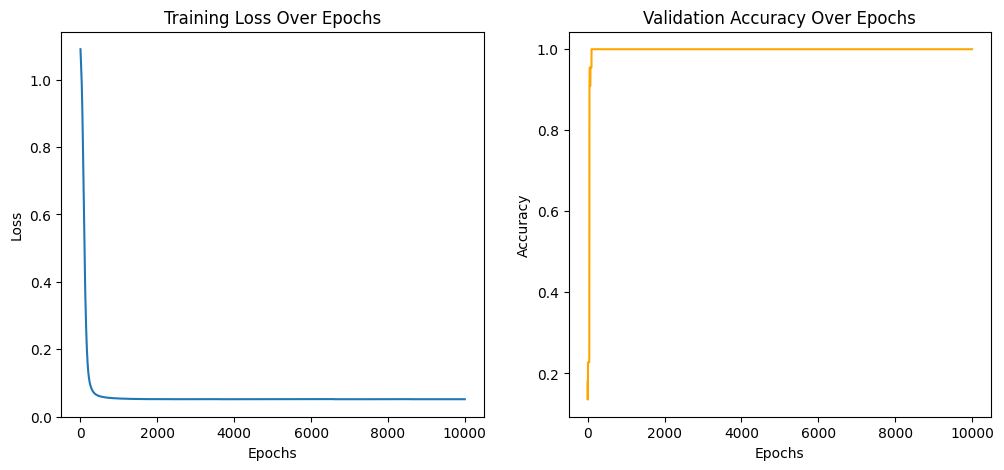

In [30]:
# 初始化模型、损失函数、优化器
net = MLP()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

# 记录损失和验证准确率
losses = []
val_accuracies = []

# 训练过程：训练10000个epoch
for epoch in range(10000):
    # 设置模型为训练模式
    net.train()
    
    # 前向传播
    optimizer.zero_grad()
    train_outputs = net(x_train)
    
    # 计算损失
    loss = criterion(train_outputs, y_train)
    
    # 反向传播
    loss.backward()
    optimizer.step()
    
    # 记录损失
    losses.append(loss.item())
    
    # 每100个epoch打印一次训练损失
    if epoch % 100 == 0:
        print(f"Epoch [{epoch+1}/10000], Loss: {loss.item():.4f}")
    
    # 每个epoch后评估验证集准确率
    net.eval()  # 设置为评估模式
    with torch.no_grad():
        val_outputs = net(x_val)
        _, val_pred = torch.max(val_outputs, 1)
        val_accuracy = accuracy_score(y_val, val_pred)
        val_accuracies.append(val_accuracy)
    
    # 打印验证准确率
    if epoch % 100 == 0:
        print(f"Validation accuracy: {val_accuracy * 100:.2f}%")

# Testing
with torch.no_grad():
    test_outputs = net(x_test)
    _, predicted = torch.max(test_outputs, 1)
    test_accuracy = accuracy_score(y_test, predicted)
    print(f"Test accuracy: {test_accuracy * 100:.2f}%")

# Plot epoch loss and accuracy graph
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(len(losses)), losses, label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Over Epochs")

plt.subplot(1, 2, 2)
plt.plot(
    range(len(val_accuracies)),
    val_accuracies,
    label="Validation Accuracy",
    color="orange",
)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Validation Accuracy Over Epochs")

plt.show()

## Task 4: Convolutional Neural Networks (CNNs) for CelebA dataset

You will now implement a CNN classifier for the CELEBA data. You will need to split you dataset onto a training, validation, and test set; you will also need to implement a basic CNN model; and you will need to train, validate, and test your model.


## Data preprocessing

You will first divide the data into three sets: a training set, validation set, and test set, with a ratio of 70:15:15.

In [32]:
# Date preprocessing
x, y = l2.extract_imgs_labels()
x = np.array(x)
x = x.transpose(0, 3, 1, 2) / 255.
x, y = shuffle(np.array(x), np.array(y), random_state=22) # random seed

# Split dataset
# Divide the data into three sets: a training set, validation set, and test set, with a ratio of 70:15:15.

x_train = torch.FloatTensor(x_train)
x_val = torch.FloatTensor(x_val)
x_test = torch.FloatTensor(x_test)
y_train = torch.LongTensor(y_train)
y_val = torch.LongTensor(y_val)
y_test = torch.LongTensor(y_test)

## Model implementation

You will now implement your CNN model taking into account the dimensions of CelebA images 3 x 256 x 256 as follows

* start with convolutional layer with an input channel of 3, output channel of 32, kernel size of 3, stride of 3, and padding of 1, followed by pooling;

* add another convolutional layer and pooling layer with an output channel of 1.

* add a final linear layer of dimensions 1024 x 1 for gender prediction.

* apply the activation function `relu()` after each layer except the output layer.

* apply the `sigmoid()` fuction before final output.

In [ ]:
# Model Neural Network
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        
        # First Convolutional Layer
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=3, padding=1)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # Second Convolutional Layer
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=1, kernel_size=3, stride=3, padding=1)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # Linear Layer for Gender Prediction
        self.fc1 = nn.Linear(1024, 1)  # Flattened image size from 256x256 to 1024
        
    def forward(self, x):
        # First Convolutional Block with ReLU and MaxPool
        x = self.pool1(F.relu(self.conv1(x)))
        
        # Second Convolutional Block with ReLU and MaxPool
        x = self.pool2(F.relu(self.conv2(x)))
        
        # Flatten the output for the fully connected layer
        x = x.view(-1, 1024)  # Flatten the tensor
        
        # Fully connected layer with sigmoid activation for binary classification
        x = torch.sigmoid(self.fc1(x))
        
        return x


# Initialize the network
net = CNN()

# Define the criterion (Binary Cross Entropy Loss)
criterion = nn.BCELoss()

# Define the optimizer (e.g., Adam with learning rate 0.003)
optimizer = torch.optim.Adam(net.parameters(), lr=0.003)

## Model training, validation, and testing

Epoch [0/10000], Loss: 0.0513, Val Accuracy: 100.00%
Epoch [100/10000], Loss: 0.0513, Val Accuracy: 100.00%
Epoch [200/10000], Loss: 0.0513, Val Accuracy: 100.00%
Epoch [300/10000], Loss: 0.0513, Val Accuracy: 100.00%
Epoch [400/10000], Loss: 0.0513, Val Accuracy: 100.00%
Epoch [500/10000], Loss: 0.0514, Val Accuracy: 100.00%
Epoch [600/10000], Loss: 0.0513, Val Accuracy: 100.00%
Epoch [700/10000], Loss: 0.0513, Val Accuracy: 100.00%
Epoch [800/10000], Loss: 0.0513, Val Accuracy: 100.00%
Epoch [900/10000], Loss: 0.0513, Val Accuracy: 100.00%
Epoch [1000/10000], Loss: 0.0513, Val Accuracy: 100.00%
Epoch [1100/10000], Loss: 0.0513, Val Accuracy: 100.00%
Epoch [1200/10000], Loss: 0.0514, Val Accuracy: 100.00%
Epoch [1300/10000], Loss: 0.0513, Val Accuracy: 100.00%
Epoch [1400/10000], Loss: 0.0514, Val Accuracy: 100.00%
Epoch [1500/10000], Loss: 0.0513, Val Accuracy: 100.00%
Epoch [1600/10000], Loss: 0.0513, Val Accuracy: 100.00%
Epoch [1700/10000], Loss: 0.0513, Val Accuracy: 100.00%
Epoc

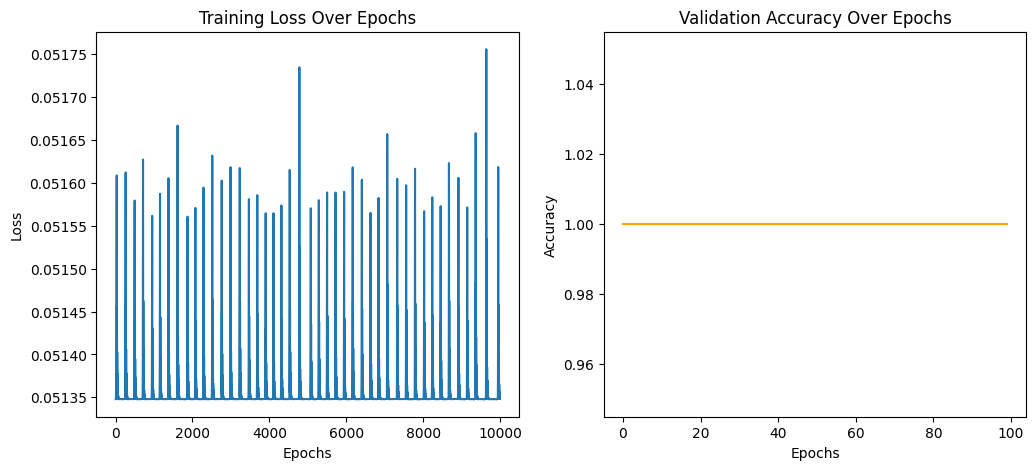

In [39]:
# Store Weights
losses = []
val_accuracies = []

# Training Loop for 10000 epochs
for epoch in range(10000):
    net.train()  # Set the model to training mode
    
    optimizer.zero_grad()  # Zero the gradients
    # Assuming x_train and y_train are your training data and labels
    outputs = net(x_train)  # Forward pass
    loss = criterion(outputs, y_train)  # Compute the loss
    
    loss.backward()  # Backward pass (compute gradients)
    optimizer.step()  # Update the model parameters
    
    # Store loss for plotting
    losses.append(loss.item())
    
    # If you have a validation set (x_val, y_val), compute the accuracy
    if epoch % 100 == 0:  # Example to compute accuracy every 100 epochs
        net.eval()  # Set the model to evaluation mode
        with torch.no_grad():
            val_outputs = net(x_val)
            val_predicted = torch.argmax(val_outputs, dim=1)  # Choose the class with the highest score
            val_accuracy = accuracy_score(y_val, val_predicted)
            val_accuracies.append(val_accuracy)
        
        print(f"Epoch [{epoch}/{10000}], Loss: {loss.item():.4f}, Val Accuracy: {val_accuracy * 100:.2f}%")

# Testing
with torch.no_grad():
    test_outputs = net(x_test)
    predicted = torch.argmax(test_outputs, dim=1)
    test_accuracy = accuracy_score(y_test, predicted)
    print(f"Test accuracy: {test_accuracy * 100:.2f}%")

# Plot epoch loss and accuracy graph
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(len(losses)), losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')

plt.subplot(1, 2, 2)
plt.plot(range(len(val_accuracies)), val_accuracies, label='Validation Accuracy', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy Over Epochs')

plt.show()